In [81]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

from datetime import datetime
import folium

In [82]:
# data from buoy #41025 off the coast of N.C USA
df = pd.read_csv('../data/raw/41025h2022.txt', delim_whitespace=True)

df.drop(index=0, inplace=True)
df = df.reset_index(drop=True)

df.head()

/var/folders/d0/7p4xxyy97qbb5_f74yjfh9vw0000gp/T/ipykernel_53410/2451028696.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('../data/raw/41025h2022.txt', delim_whitespace=True)
/var/folders/d0/7p4xxyy97qbb5_f74yjfh9vw0000gp/T/ipykernel_53410/2451028696.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/41025h2022.txt', delim_whitespace=True)


,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,2022,01,01,00,00,205,3.8,5.2,99.00,99.00,99.00,999,1016.4,18.5,23.7,17.8,99.0,99.00
1,2022,01,01,00,10,204,3.6,5.1,99.00,99.00,99.00,999,1016.4,18.7,23.7,17.8,99.0,99.00
2,2022,01,01,00,20,199,4.2,5.7,99.00,99.00,99.00,999,1016.3,18.9,23.7,17.9,99.0,99.00
3,2022,01,01,00,30,199,4.6,6.1,99.00,99.00,99.00,999,1016.4,19.1,23.7,18.1,99.0,99.00
4,2022,01,01,00,40,202,4.8,6.1,0.70,12.12,5.74,87,1016.4,19.2,23.7,18.2,99.0,99.00


In [83]:
df.rename(columns={'#YY': 'year', 'MM': 'month', 'DD': 'day', 'hh': 'hour', 'mm': 'minute'}, inplace=True)
# df['#YY'] = pd.to_numeric(df['#YY'])
# df['MM'] = pd.to_numeric(df['MM'])
# df['DD'] = pd.to_numeric(df['DD'])
# df['hh'] = pd.to_numeric(df['hh'])

df['time'] = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute']])
df.drop(columns=['year', 'month', 'day', 'hour', 'minute'], inplace=True)

""" curating the data to match Chaichitehrani et al. (2024)
    WDIR - wind direction
    WSPD - wind speed
    GST - wind gust speed
    WVHT - significant wave height (target)
    DPD - dominant wave period
    APD - average wave period (auxiliary target)
    PRES - sea level pressure
    ATMP - air temperature
    WTMP - water temperature
    DEWP - dewpoint temperature
"""

df.drop(columns=['MWD', 'VIS', 'TIDE'], inplace=True)

df.head()

,WDIR,WSPD,GST,WVHT,DPD,APD,PRES,ATMP,WTMP,DEWP,time
0,205,3.8,5.2,99.00,99.00,99.00,1016.4,18.5,23.7,17.8,2022-01-01 00:00:00
1,204,3.6,5.1,99.00,99.00,99.00,1016.4,18.7,23.7,17.8,2022-01-01 00:10:00
2,199,4.2,5.7,99.00,99.00,99.00,1016.3,18.9,23.7,17.9,2022-01-01 00:20:00
3,199,4.6,6.1,99.00,99.00,99.00,1016.4,19.1,23.7,18.1,2022-01-01 00:30:00
4,202,4.8,6.1,0.70,12.12,5.74,1016.4,19.2,23.7,18.2,2022-01-01 00:40:00


In [84]:
df[['WDIR', 'WSPD', 'GST', 'WVHT', 'DPD', 'APD', 'PRES', 'ATMP', 'WTMP', 'DEWP']] = df[['WDIR', 'WSPD', 'GST', 'WVHT', 'DPD', 'APD', 'PRES', 'ATMP', 'WTMP', 'DEWP']].astype(float)

# df = df[df['time'].dt.minute == 0]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52526 entries, 0 to 52525
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   WDIR    52526 non-null  float64       
 1   WSPD    52526 non-null  float64       
 2   GST     52526 non-null  float64       
 3   WVHT    52526 non-null  float64       
 4   DPD     52526 non-null  float64       
 5   APD     52526 non-null  float64       
 6   PRES    52526 non-null  float64       
 7   ATMP    52526 non-null  float64       
 8   WTMP    52526 non-null  float64       
 9   DEWP    52526 non-null  float64       
 10  time    52526 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(10)
memory usage: 4.4 MB


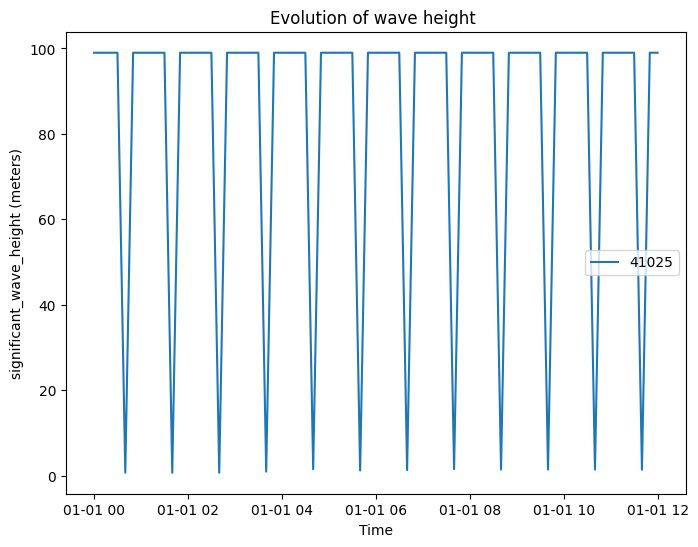

In [85]:
start_date = df['time'].min()
end_date = start_date + pd.DateOffset(hours=12)

df_slice = df[(df['time'] >= start_date) & (df['time'] <= end_date)]

plt.figure(figsize=(8, 6))
plt.plot(df_slice['time'], df_slice['WVHT'],label="41025")

plt.xlabel('Time')
plt.ylabel('significant_wave_height (meters)')
plt.title('Evolution of wave height ')
plt.legend()

plt.show()

In [86]:
print(df['WVHT'].describe())
print(df['WVHT'].median())

count    52526.000000
mean        97.827906
std         10.604564
min          0.350000
25%         99.000000
50%         99.000000
75%         99.000000
max         99.000000
Name: WVHT, dtype: float64
99.0


In [87]:
target_tensor = torch.tensor(df['WVHT'].values, dtype=torch.float32)
data_tensor = torch.tensor(df.drop(columns=['WVHT', 'time'], axis=1).values, dtype=torch.float32)

tensor_dataset = {
    'features': data_tensor,
    'target': target_tensor
}

torch.save(tensor_dataset, '../data/pt/waves-41025.pt')